In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [4]:
x

array([[ 3.19870701, -2.74619154],
       [-2.01202124,  8.73538319],
       [ 2.5797465 , -2.71860202],
       ...,
       [-2.85865141,  8.58247758],
       [ 2.28878559,  8.79135334],
       [ 4.39601958,  7.01201226]], shape=(1000, 2))

In [5]:
y

array([1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1,
       1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0,
       2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2,
       1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0,

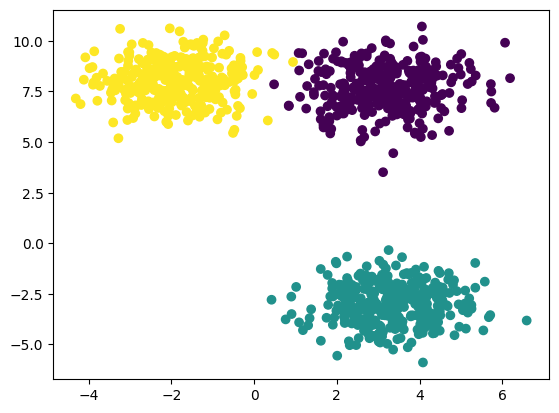

In [10]:
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
# Standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Elbow method to select k values
wcss = []

for k in range(1, 11):
    Kmeans = KMeans(n_clusters=k, init='k-means++')
    Kmeans.fit(x_train_scaled)
    wcss.append(Kmeans.inertia_) # gives the sum of squared distances (SSD)

print(wcss)

[1340.0000000000007, 545.2500049378048, 118.98698103259925, 98.14182179866707, 78.98051922362957, 58.00305683221564, 67.93987124924813, 46.94412732876265, 42.45808284344821, 39.50711926306981]


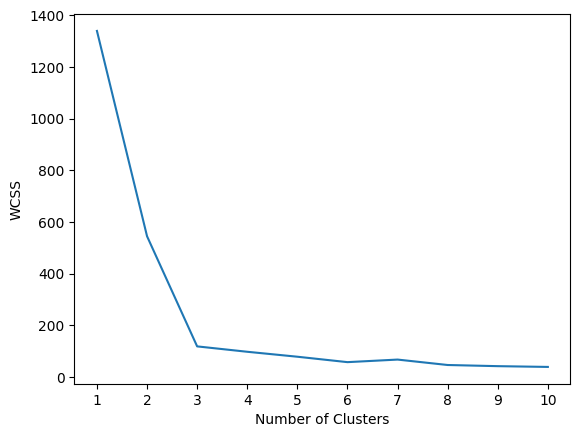

In [16]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=3,init="k-means++")

kmeans.fit_predict(x_train_scaled)

y_pred = kmeans.predict(x_test_scaled)
print(y_pred)

[1 1 0 2 0 1 2 0 0 0 2 2 2 0 1 1 1 1 1 0 1 2 2 2 2 0 2 2 2 0 1 2 2 2 0 0 0
 0 1 0 2 1 1 1 1 1 2 1 0 1 1 2 2 0 0 0 1 1 2 0 0 1 1 0 1 1 0 2 0 1 0 1 2 1
 2 2 0 2 2 2 2 0 0 1 2 0 2 1 2 1 0 1 1 1 1 0 2 1 2 2 1 0 2 2 2 0 1 0 1 2 2
 2 2 2 2 0 2 2 2 2 1 0 2 0 1 0 1 0 1 1 1 1 2 1 2 0 2 1 1 0 0 1 2 2 1 0 1 2
 0 0 0 2 2 0 1 1 0 1 2 2 0 0 1 1 2 1 1 1 2 1 0 1 0 1 2 2 1 0 1 1 0 1 0 0 0
 0 2 2 2 0 0 2 2 0 2 2 1 1 0 0 1 1 1 1 0 0 2 0 2 0 0 0 1 2 0 1 1 1 2 1 1 1
 0 1 2 0 1 0 1 0 2 0 1 2 0 1 1 0 2 0 0 2 0 2 1 2 1 1 0 0 0 2 1 0 2 2 0 1 1
 1 1 2 2 0 2 2 0 2 0 2 0 1 1 2 0 1 0 0 0 1 2 0 1 1 2 1 2 1 0 0 1 2 2 1 1 0
 2 1 2 0 2 2 1 1 2 1 0 1 0 1 2 2 2 0 1 0 0 2 0 0 2 1 1 1 2 2 0 2 0 2]


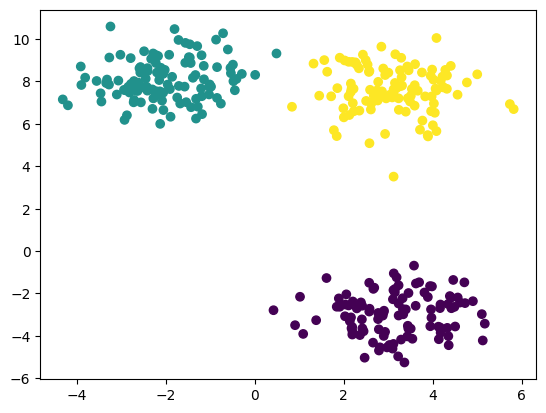

In [18]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [21]:
# automatically finds the elbow (knee) point
from kneed import KneeLocator

k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
print(k1.elbow)

3


### **Silhouette Score**

It measures how well each data point fits within its assigned cluster compared to other clusters.
It combines two concepts:

1. **Cohesion (a(i))** → how close a point is to other points in its own cluster.

   * Lower distance = better.

2. **Separation (b(i))** → how far a point is from the nearest other cluster.

   * Higher distance = better.

For each point $i$:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

* $a(i)$ = average distance from $i$ to all other points in the same cluster.
* $b(i)$ = average distance from $i$ to all points in the nearest *other* cluster.

---

### **Interpretation**

* $s(i)$ ranges between **-1 and 1**.

  * **Close to +1** → well clustered (inside its cluster, far from others).
  * **Around 0** → on the border between clusters.
  * **Negative (<0)** → probably in the wrong cluster.

The **overall Silhouette Score** is the average of all points’ scores.

In [22]:
from sklearn.metrics import silhouette_score

silhouette_coeff = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coeff.append(score)

print(silhouette_coeff)

[np.float64(0.5380285104882252), np.float64(0.7298391840601055), np.float64(0.6150507055469931), np.float64(0.5102430742878666), np.float64(0.42155438464566164), np.float64(0.3804716491057522), np.float64(0.3985852061029379), np.float64(0.3700510470141461), np.float64(0.3363770134294286)]


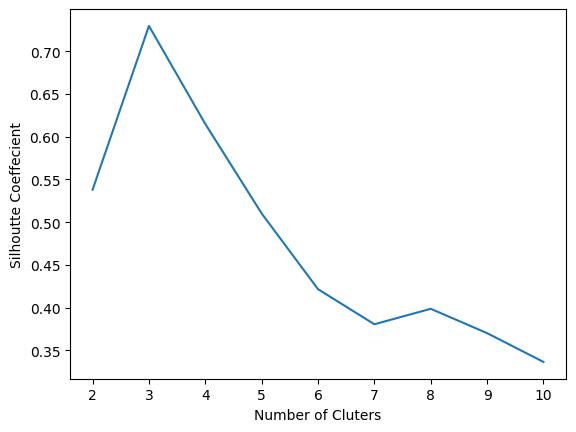

In [23]:
# plotting silhouette score
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()